In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


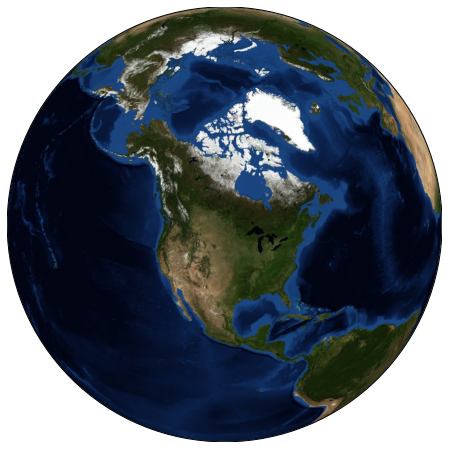

In [5]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho',resolution=None,lat_0=50,lon_0=-100)
m.bluemarble(scale=.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


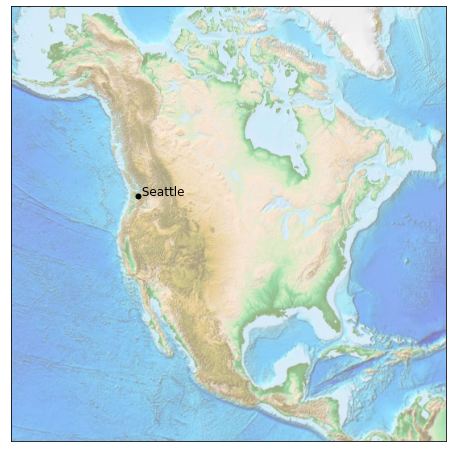

In [6]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',resolution=None,
           width=8E6,height=8E6,
           lat_0=45,lon_0=-100)
m.etopo(scale=.5,alpha=.5)

#地图上的经纬度对应图上的坐标
x,y = m(-122.3,47.6)
plt.plot(x,y,'ok',markersize=5)
plt.text(x,y,' Seattle',fontsize=12);

In [ ]:
from itertools import chain

In [ ]:
def draw_map(m,scale=.2):
    #画地貌晕渲图
    m.shadedrelief(scale=scale)
    
    #用字典表示经纬度
    lats = m.drawparallels(np.linspace(-90,90,13))
    lons = m.drawmeridians(np.linspace(-180,180,13))    
    
    #字典的键是plt.Line2D示例
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines,lon_lines)
    
    #用循环将所有线设置成需要的样式
    for line in all_lines:
        line.set(linestyle='-',alpha=.3,color='w')

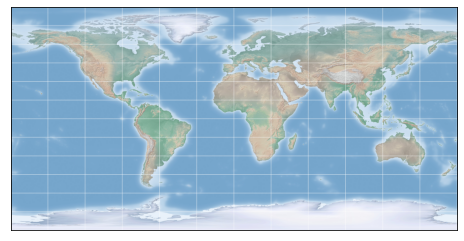

In [ ]:
fig = plt.figure(figsize=(8,6),edgecolor='w')
m = Basemap(projection='cyl',resolution=None,
           llcrnrlat=-90,urcrnrlat=90,
           llcrnrlon=-180,urcrnrlon=180)
draw_map(m)

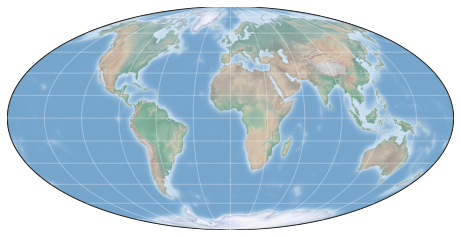

In [ ]:
fig = plt.figure(figsize=(8,6),edgecolor='w')
m = Basemap(projection='moll',resolution=None,
           lat_0=0,lon_0=0)
draw_map(m)

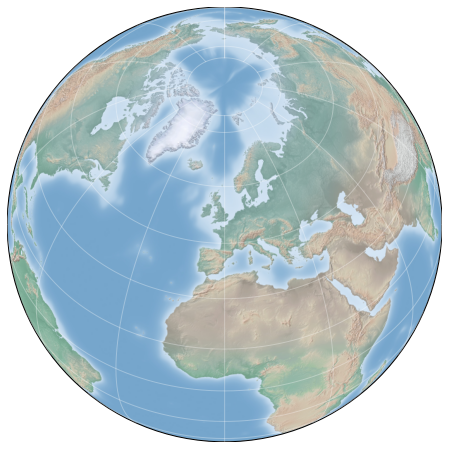

In [ ]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='ortho',resolution=None,
           lat_0=50,lon_0=0)
draw_map(m)

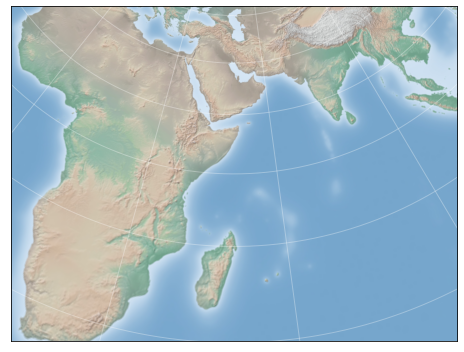

In [ ]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',resolution=None,
           lat_0=0,lon_0=50,lat_1=45,lat_2=55,
           width=1.6E7,height=1.2E7)
draw_map(m)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
m = Basemap(projection='gnom',lat_0=57.3,lon_0=-6.2,
           width=90000,height=120000,resolution='c',ax=ax[0])
m.fillcontinents(color="#FFDDCC",lake_color='#DDEEFF')
m.drawmapboundary(fill_color='#DDEEFF')
m.drawcoastlines()

In [7]:
import pandas as pd

In [8]:
cities = pd.read_csv('../data/california_cities.csv')

#提取需要的数据
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

In [ ]:
#1.绘制地图背景
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',resolution='c',
           lat_0=37.5,lon_0=-119,
           width=1E6,height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

#2.绘制城市数据散点，用颜色表示人口数据
m.scatter(lon,lat,latlon=True,
         c=np.log10(population),s=area,
         cmap='Reds',alpha=.5)

#3.创建颜色条和图例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3,7)

#用虚拟点绘制图例
for a in [100,300,500]:
    plt.scatter([],[],c='k',alpha=.5,s=a,
               label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left');

In [4]:
from netCDF4 import Dataset

data = Dataset('../data/gistemp250.nc')

In [5]:
from netCDF4 import date2index
from datetime import datetime

timeindex = date2index(datetime(2014,1,15),data.variables['time'])

In [6]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon,lat = np.meshgrid(lon,lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

In [7]:
fig = plt.figure(figsize=(10,8))
m = Basemap(projection=' lcc',resolution=None,
           width=8E6,height=8E6,
           lat_0=45,lon_0=-100,)
m.shaderelief(scale=.5)
m.pcolormesh(lon,lat,temp_anomaly,
            latlon=True,cmap=' RdBu_r')
plt.clim(-8,8)
m.drawcoastlines(color=' lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly(度C)');

ValueError: ' lcc' is an unsupported projection.
The supported projections are:
 cyl              Cylindrical Equidistant                 
 merc             Mercator                                
 tmerc            Transverse Mercator                     
 omerc            Oblique Mercator                        
 mill             Miller Cylindrical                      
 gall             Gall Stereographic Cylindrical          
 cea              Cylindrical Equal Area                  
 lcc              Lambert Conformal                       
 laea             Lambert Azimuthal Equal Area            
 nplaea           North-Polar Lambert Azimuthal           
 splaea           South-Polar Lambert Azimuthal           
 eqdc             Equidistant Conic                       
 aeqd             Azimuthal Equidistant                   
 npaeqd           North-Polar Azimuthal Equidistant       
 spaeqd           South-Polar Azimuthal Equidistant       
 aea              Albers Equal Area                       
 stere            Stereographic                           
 npstere          North-Polar Stereographic               
 spstere          South-Polar Stereographic               
 cass             Cassini-Soldner                         
 poly             Polyconic                               
 ortho            Orthographic                            
 geos             Geostationary                           
 nsper            Near-Sided Perspective                  
 sinu             Sinusoidal                              
 moll             Mollweide                               
 hammer           Hammer                                  
 robin            Robinson                                
 kav7             Kavrayskiy VII                          
 eck4             Eckert IV                               
 vandg            van der Grinten                         
 mbtfpq           McBryde-Thomas Flat-Polar Quartic       
 gnom             Gnomonic                                
 rotpole          Rotated Pole                            


<Figure size 720x576 with 0 Axes>